In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
dataset = pd.read_csv('data/titanic.csv')

In [3]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
dataset.dropna(how='all', inplace=True)

In [7]:
dataset['Pclass'] = dataset['Pclass'].astype('float')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB


In [9]:
dataset['Pclass'] = dataset['Pclass'].astype('int')

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int32  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 80.2+ KB


In [11]:
dataset['Sex'].replace({'male':0,'female':1},inplace=True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

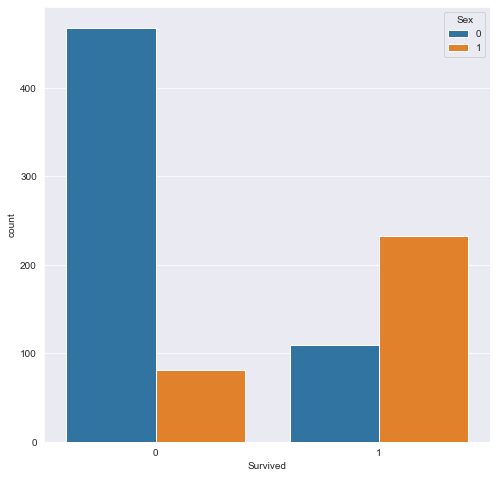

In [12]:
plt.figure(figsize=(8,8))
sns.countplot(x=dataset['Survived'],hue=dataset['Sex'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

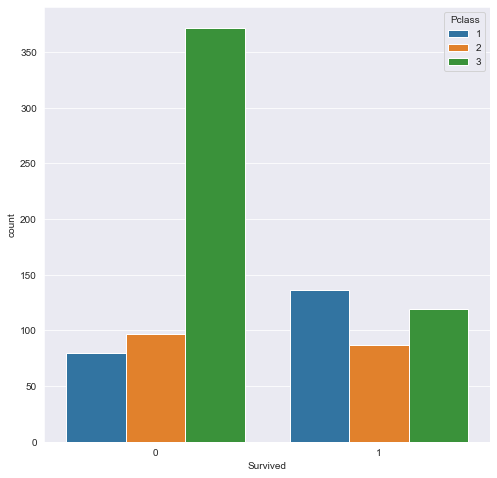

In [13]:
plt.figure(figsize=(8,8))
sns.countplot(x=dataset['Survived'],hue=dataset['Pclass'])

In [14]:
dataset.Age.mean()

29.69911764705882

In [15]:
dataset.Age.median()

28.0

In [16]:
dataset.Age.isna().sum()

177

In [17]:
from sklearn.impute import SimpleImputer

In [18]:
imp = SimpleImputer(strategy='median',)
dataset.Age = imp.fit_transform(dataset.Age.values.reshape(-1,1))

In [19]:
dataset.Age.isna().sum()

0

In [20]:
dataset.Embarked.fillna('S', inplace=True)

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset.Embarked = le.fit_transform(dataset.Embarked)
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,0


In [22]:
dataset.Embarked.value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [23]:
dataset.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

<AxesSubplot:>

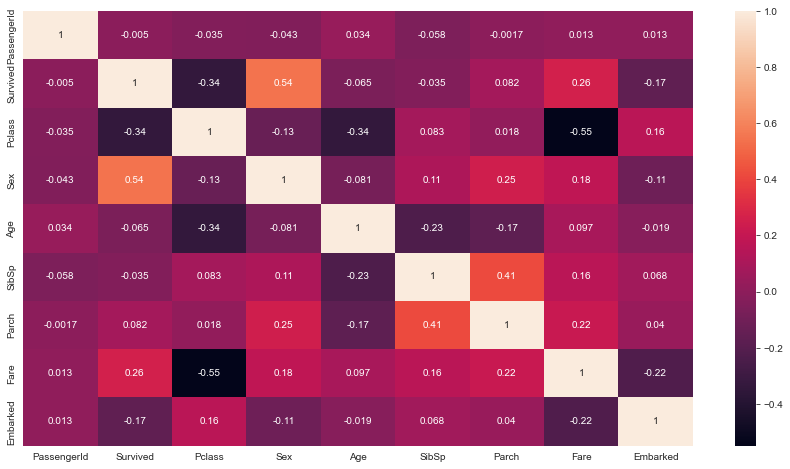

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(),annot = True)

In [25]:
dataset.Name = dataset.Name.apply(lambda x: x.split(', ')[-1].split('. ')[0])

In [26]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,0,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,Mrs,1,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,Miss,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,Mrs,1,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,Mr,0,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev,0,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,Miss,1,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,Miss,1,28.0,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,Mr,0,26.0,0,0,111369,30.0000,C148,0


In [27]:
dataset.rename(columns={'Name':'Title'}, inplace=True)

In [28]:
dataset

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,0,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,Mrs,1,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,Miss,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,Mrs,1,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,Mr,0,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev,0,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,Miss,1,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,Miss,1,28.0,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,Mr,0,26.0,0,0,111369,30.0000,C148,0


In [29]:
dataset.Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [30]:
keep_ls = ['Mr','Miss','Mrs']
for row in range(len(dataset.Title)):
    if dataset.loc[row,'Title'] not in keep_ls:
        dataset.loc[row,'Title'] = 'Other'

In [31]:
dataset

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,0,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,Mrs,1,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,Miss,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,Mrs,1,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,Mr,0,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Other,0,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,Miss,1,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,Miss,1,28.0,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,Mr,0,26.0,0,0,111369,30.0000,C148,0


In [32]:
dataset.Title.value_counts()

Mr       517
Miss     182
Mrs      125
Other     67
Name: Title, dtype: int64

In [33]:
dataset.Title = le.fit_transform(dataset.Title)
dataset

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,0,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,2,1,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,0,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,2,1,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,1,0,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,3,0,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,0,1,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,0,1,28.0,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,1,0,26.0,0,0,111369,30.0000,C148,0


In [34]:
dataset.Title.value_counts()

1    517
0    182
2    125
3     67
Name: Title, dtype: int64

In [35]:
dataset.drop(['Ticket','Cabin'], axis=1, inplace=True)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

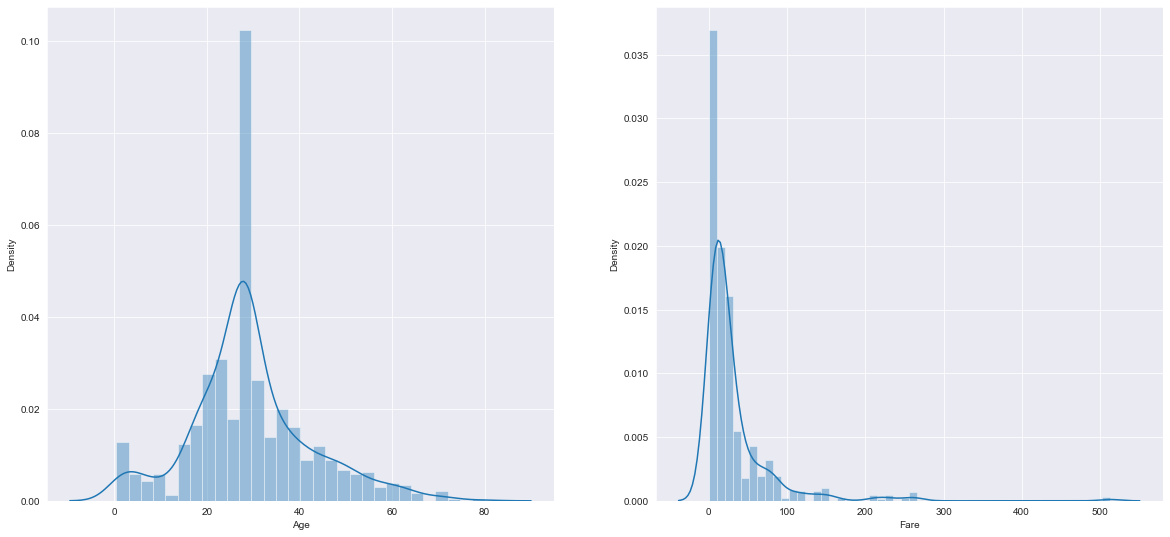

In [110]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.distplot(dataset.Age)
plt.subplot(2,2,2)
sns.distplot(dataset.Fare)

<AxesSubplot:>

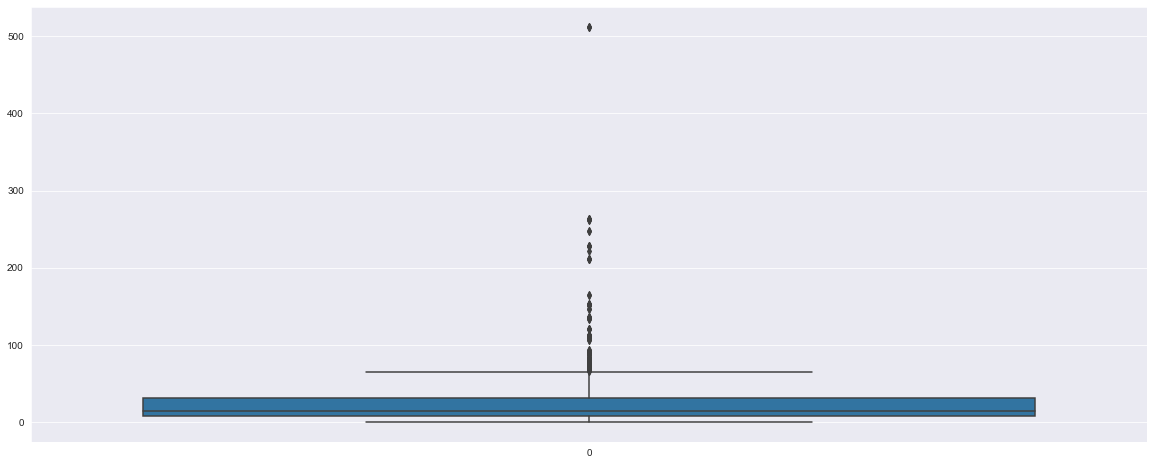

In [63]:
plt.figure(figsize=(20,8))
sns.boxplot(dataset.Fare)

In [38]:
dataset.Fare.max()

512.3292

In [39]:
dataset.Fare.min()

0.0

<AxesSubplot:>

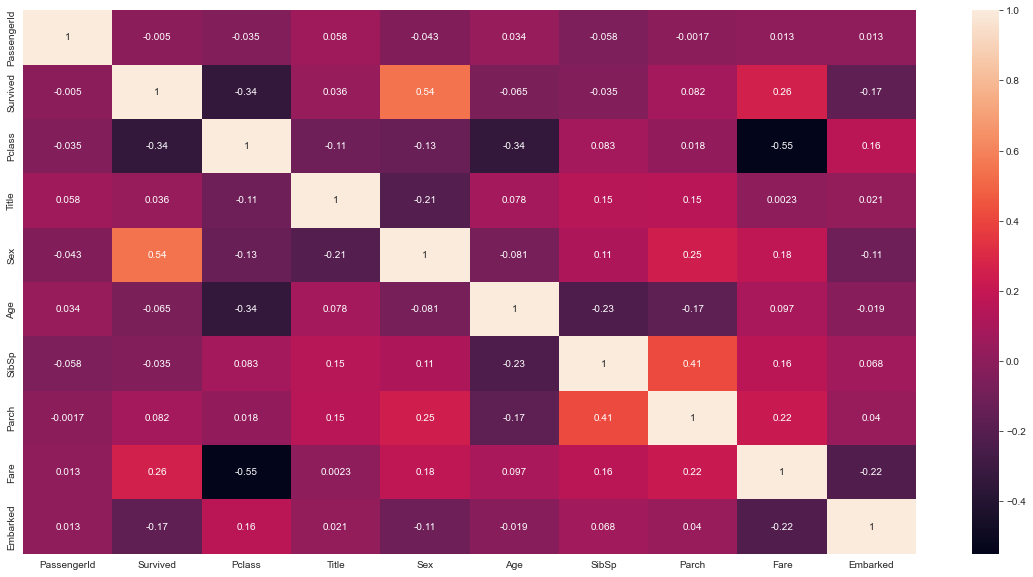

In [109]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(), annot=True)

In [58]:
q1 = np.quantile(dataset.Fare,0.25)
q3 = np.quantile(dataset.Fare, 0.75)
q2 = np.quantile(dataset.Fare,0.5)
iqr = q3-q1
iqr

23.0896

In [54]:
lower = q1-1.5*iqr
upper = q3+1.5*iqr

In [55]:
lower,upper

(-26.724, 65.6344)

In [59]:
dataset

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,0,22.0,1,0,7.2500,2
1,2,1,1,2,1,38.0,1,0,71.2833,0
2,3,1,3,0,1,26.0,0,0,7.9250,2
3,4,1,1,2,1,35.0,1,0,53.1000,2
4,5,0,3,1,0,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,3,0,27.0,0,0,13.0000,2
887,888,1,1,0,1,19.0,0,0,30.0000,2
888,889,0,3,0,1,28.0,1,2,23.4500,2
889,890,1,1,1,0,26.0,0,0,30.0000,0


####
# Machine Learning
###